In [34]:
import pandas as pd
import sklearn.model_selection as train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [35]:
## load the dataset
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
## Preprocess the dataset
# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [37]:
## Encode categorical variables
label_encoder_gender = LabelEncoder()
data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [38]:
## one hot geography 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
geography_encoded = one_hot_encoder.fit_transform(data[['Geography']])
geography_encoded


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10000 stored elements and shape (10000, 3)>

In [39]:
one_hot_encoder.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [40]:
geography_encoded_df = pd.DataFrame(geography_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(['Geography']))
geography_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [41]:
## combine the encoded geography with the original data
data = pd.concat([data.drop('Geography', axis=1), geography_encoded_df], axis=1)
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


In [42]:
## save the encorders and scaler
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)
with open('one_hot_encoder_geography.pkl', 'wb') as file:
    pickle.dump(one_hot_encoder, file)

In [43]:
## Divide the dataset into independent and dependent variables
x = data.drop('Exited', axis=1)
y = data['Exited']

## split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split.train_test_split(x, y, test_size=0.2, random_state=42)

## Scale the features 
StandardScaler = StandardScaler()
x_train = StandardScaler.fit_transform(x_train)
x_test = StandardScaler.transform(x_test)  

In [44]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(StandardScaler, file)

x_train.shape[1]    

12

In [45]:
## ANN Implmentation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [46]:
## Build the ANN model
model = Sequential([
Dense(64, activation='relu', input_shape=(x_train.shape[1],)), # HL1
Dense(32, activation='relu'), # HL2
Dense(1, activation='sigmoid'), # HL3
])
model.summary()

c:\Users\91988\Desktop\Roadmap-To-AI-ML\neural-networks\ann-classification\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
## Compile the model
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [48]:
## setup tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [49]:
# Setup early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
## Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, 
                    validation_split=0.2, 
                    callbacks=[early_stopping, tensorboard_callback])
## Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8024 - loss: 0.4860 - val_accuracy: 0.8288 - val_loss: 0.4113
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8274 - loss: 0.4057 - val_accuracy: 0.8431 - val_loss: 0.3857
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.3660 - val_accuracy: 0.8469 - val_loss: 0.3690
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3593 - val_accuracy: 0.8519 - val_loss: 0.3558
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.3530 - val_accuracy: 0.8487 - val_loss: 0.3492
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8576 - loss: 0.3471 - val_accuracy: 0.8475 - val_loss: 0.3516
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8617 - loss: 0.3374 - val_accuracy: 0.8525 - val_loss: 0.3465
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8670 - loss: 0.3288 - val_accuracy: 0.

In [50]:
## Load extension
%load_ext tensorboard
## Start tensorboard
%tensorboard --logdir logs/fit --port 6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 9768), started 1:17:35 ago. (Use '!kill 9768' to kill it.)

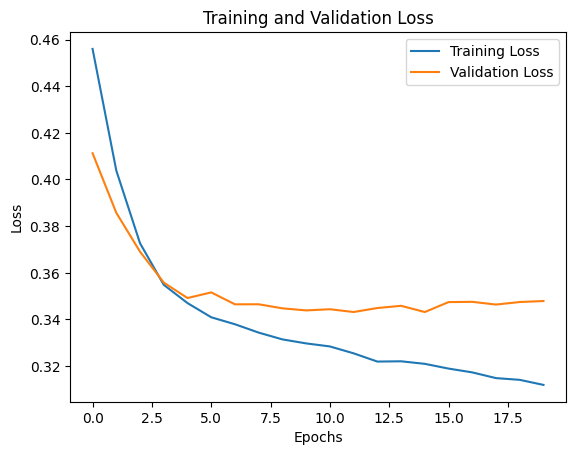

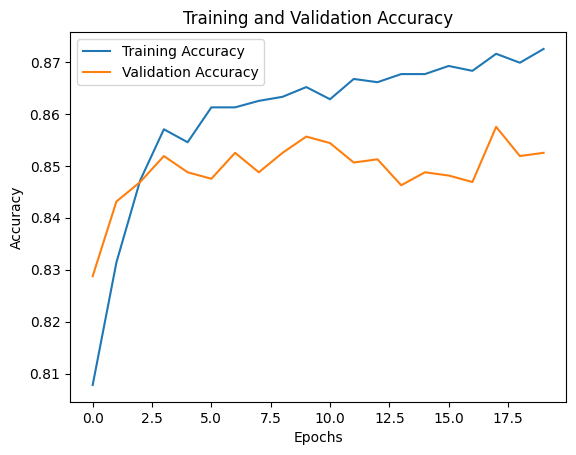

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.72      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000

[[1534   73]
 [ 205  188]]
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0


In [51]:
## Save the model
model.save('ann_model.h5')
## Save the training history
import pickle
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)
## Load the model and history
from tensorflow.keras.models import load_model
loaded_model = load_model('ann_model.h5')
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)
## Plot the training history
import matplotlib.pyplot as plt
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')    
plt.ylabel('Loss')
plt.legend()    
plt.title('Training and Validation Loss')
plt.show()
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## Make predictions
predictions = loaded_model.predict(x_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary predictions
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
## Save the predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
predictions_df.to_csv('predictions.csv', index=False)
## Load the predictions
loaded_predictions = pd.read_csv('predictions.csv')
print(loaded_predictions.head())